In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import mne
from mew import signal

%load_ext autoreload
%autoreload 2

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,12)

In [2]:
eeg_file_path = 'Data/10024/EEG_10024/'
mat_file_path = 'Data/10024/190227_10024.mat'

In [3]:
mat = sio.loadmat(mat_file_path)
eeg = mne.io.read_raw_brainvision(eeg_file_path+'10024.vhdr') 

Extracting parameters from Data/10024/EEG_10024/10024.vhdr...
Setting channel info structure...


<ipython-input-3-26d948b7258d>:2: DeprecationWarning: stim_channel (default True in 0.17) will change to False in 0.18 and be removed in 0.19, set it to False in 0.17 to avoid this warning
  eeg = mne.io.read_raw_brainvision(eeg_file_path+'10024.vhdr')
<ipython-input-3-26d948b7258d>:2: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file_path+'10024.vhdr')


Used Annotations descriptions: ['Stimulus/S  2', 'Stimulus/S  8', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  7', 'Stimulus/S 10', 'Stimulus/S 18', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S  9', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 16', 'Stimulus/S 17', 'Stimulus/S 19']


<ipython-input-3-26d948b7258d>:2: RuntimeWarning: 1 event(s) will be dropped, such as ['Comment/Active Shielding: On']. Consider using the event_id parameter to parse events that do not follow the BrainVision format. For more information, see the docstring of read_raw_brainvision.
  eeg = mne.io.read_raw_brainvision(eeg_file_path+'10024.vhdr')


In [4]:
eeg.pick_types

<bound method pick_types of <RawBrainVision  |  10024.eeg, n_channels x n_times : 66 x 17770100 (3554.0 sec), ~167 kB, data not loaded>>

Text(0, 0.5, 'EEG data (T)')

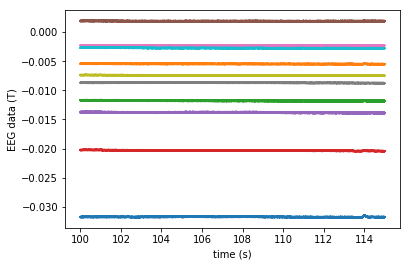

In [5]:
start, stop = eeg.time_as_index([100, 115])
data, times = eeg[:10, start:stop]

import matplotlib.pyplot as plt
import plotly.plotly as py

plt.plot(times, data.T)
plt.xlabel('time (s)')
plt.ylabel('EEG data (T)')


In [6]:
eeg.info

<Info | 17 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, ...
    chs : list | 66 items (EEG: 63, MISC: 2, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 65 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 1350.0 Hz
    meas_date : tuple | 2019-02-27 16:57:14 GMT
    nchan : int | 66
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 5000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneTyp

In [7]:
event_markers = mne.find_events(eeg)

6943 events found
Event IDs: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [8]:
event_markers.shape

(6943, 3)

In [9]:
trial_start_inx = event_markers[event_markers[:,2] == 12]
trial_end_inx = event_markers[event_markers[:,2] == 15]

In [10]:
data, times = eeg[:,:]

In [11]:
data.shape

(66, 17770100)

In [12]:
times.shape

(17770100,)

In [13]:
positive = np.ones(100)
neutral = np.zeros(100)
negative = np.zeros(100)-1

In [14]:
labels = np.hstack([positive, neutral, negative])

In [15]:
all_trials=[]
deleted_label_inx = []
for i in range(len(trial_start_inx)):
    eeg_this_trial = data[:, trial_start_inx[i][0]:trial_end_inx[i][0]]
    if eeg_this_trial.shape[1] < 50000: 
        all_trials.append(eeg_this_trial)
    else:
        deleted_label_inx.append(i)

In [16]:
labels = np.delete(labels, deleted_label_inx)

In [17]:
len(labels)

232

In [18]:
len(all_trials)

232

In [19]:
len(all_trials[0])

66

In [20]:
len(all_trials)

232

In [21]:
min_len = 100000
for i in range(len(all_trials)):
    current_len = all_trials[i].shape[1]
    if current_len < min_len:
        min_len = current_len
min_len

40401

In [22]:
equal_len_eeg = []
for i in range(len(all_trials)):
    equal_len_eeg.append(all_trials[i][:, :min_len])

In [23]:
eeg_signal = signal.EEG(equal_len_eeg[0][:,10000:], eeg.ch_names, 5000)

In [24]:
eeg_signal.ch_names()

dict_keys(['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'AF8', 'AF4', 'F2', 'FCz', 'HEOG', 'VEOG', 'STI 014'])

In [25]:
eeg_signal.times

array([0.0000e+00, 2.0000e-04, 4.0000e-04, ..., 6.0796e+00, 6.0798e+00,
       6.0800e+00])

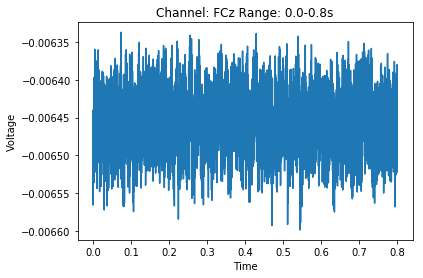

In [26]:
eeg_signal.plot('FCz', signal_range=[0,4000])

In [27]:
from scipy.signal import spectrogram

In [ ]:
f, t, Sxx = spectrogram(eeg_signal.get_channel('FCz'), 5000)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
Sxx.shape

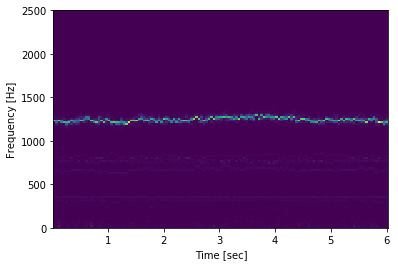

In [35]:
f, t, Sxx = spectrogram(eeg_signal.get_channel('F7'), 5000)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [36]:
def make_spectrograms(eeg_signal):
    reference_channel = ['HEOG', 'VEOG', 'STI 014']
    spectrogram_list = []
    for channel in eeg_signal.ch_names():
        if channel not in reference_channel:
            f, t, Sxx = spectrogram(eeg_signal.get_channel(channel), 5000, detrend='constant')
            spectrogram_list.append(Sxx)

    spectrograms = np.dstack(spectrogram_list)
    return spectrograms

In [37]:
spectrograms = make_spectrograms(eeg_signal)

In [38]:
temp_list = []
for i in range(len(equal_len_eeg)):
    eeg_signal = signal.EEG(equal_len_eeg[i][:,10000:], eeg.ch_names, 5000)
    spectrograms = make_spectrograms(eeg_signal)
    temp_list.append(spectrograms)
    


In [39]:
X = np.stack(temp_list)

In [40]:
X_flatten = np.vstack([x.flatten() for x in X])

In [41]:
X_flatten.shape

(232, 1097145)

# Try different combination of channels and frequency bands

In [35]:
# Try out different channels based on the emotional classification paper on EEG
# Based of what the paper talked about, the beta and gamma frequency bands are the best ones
# also, 6 channels seems to be the best option.
# So this time we will try these channel first:
six_channels = ["FT7" , "FT8" , "T7" , "T8" , "TP7", "TP8"]

signals = eeg_signal.get_channels(six_channels)

In [36]:
signals.shape

(6, 30401)

In [37]:
data.shape

(66, 17770100)

In [39]:
from mew import frequency

In [43]:
# from sklearn.model_selection import cross_val_score
# from sklearn.datasets import load_iris
# from sklearn.ensemble import AdaBoostClassifier

# clf = AdaBoostClassifier(n_estimators=100)
# scores = cross_val_score(clf, X_flatten, labels, cv=5)

In [44]:
# np.mean(scores)

In [45]:
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
# scores = cross_val_score(clf, X_flatten, labels, cv=5)
# scores.mean()

In [47]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(X_flatten, labels)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
clf.score(X_flatten, labels)

0.34051724137931033